# Budget Analysis

---

## Environment Setup

In [6]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [23]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [7]:
# Set environment variables from the .env file
load_dotenv()

True

In [8]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")
print(PLAID_SECRET)

a583902a8c8945cd67d1f870682a25


---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [10]:
# Create the client object
client = plaid.Client(
    client_id=PLAID_CLIENT_ID,
    secret=PLAID_SECRET,
    public_key=PLAID_PUBLIC_KEY,
    environment="sandbox"
)

In [13]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [22]:
# Create the public token
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSITUTION_ID,["transactions","income","assets"])
print(create_tkn_response["public_token"])
# Print the public token
## Hidden and commented out for privacy


public-sandbox-cdd00b9e-c430-4abb-b686-277e24dce4fa


### 3. Exchange the public token for an access token

In [17]:
# Retrieve the access token
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response["public_token"])

# Print the access token
print(exchange_response["access_token"])


access-sandbox-5a3ed6d0-4507-4465-9b4a-78088d1e6430


In [18]:
# Store the access token in a Python variable
access_token = exchange_response["access_token"]

### 4. Fetch Accounts

In [25]:
# Retrieve accounts
chart_of_accounts=client.Accounts.get(access_token)


# Print accounts
## Used function pretty print
pretty_print_response(chart_of_accounts)

{
    "accounts": [
        {
            "account_id": "JL1859vwVxUJ7RykJemBf5RyrqDp8pFdMDQLn",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "kEJGqk3MADcaVbv3aQdpc9kZqLeEdEIWDlJba",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [26]:
# Set the start and end date 90 days from today
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now()) 


# Retrieve the transactions for the last 90 days
transactions_response = client.Transactions.get(access_token, start_date, end_date)
# Print the transactions
pretty_print_response(transactions_response)

{
    "accounts": [
        {
            "account_id": "JL1859vwVxUJ7RykJemBf5RyrqDp8pFdMDQLn",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "kEJGqk3MADcaVbv3aQdpc9kZqLeEdEIWDlJba",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

### 2. Print the categories for each transaction

In [37]:
# Create a for-loop to print the categories for each transaction
count=0
for key, value in transactions_response.items():
    if key == "transactions":
        for element in transactions_response["transactions"]:
            for key1,value1 in element.items():
                if key1=='category':
                    print(value1)
                    count=count+1
print(f"Total Transactions is {count}")

['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'R

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [115]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
TargetDF=pd.DataFrame(columns=["date", "name", "amount", "category"])
# Retrieve all the transactions
count=0
for key, value in transactions_response.items():
    if key == "transactions":
        newcount=0
        for element in transactions_response["transactions"]:
            sample_list=[element["date"],element["name"],element["amount"],element["category"]]
            TargetDF.loc[newcount]=sample_list
            newcount=newcount+1
# Populate the transactions DataFrame with the transactions data

# Display sample data from the DataFrame    
TargetDF.head()

,date,name,amount,category
0,2020-06-29,United Airlines,500,"[Travel, Airlines and Aviation Services]"
1,2020-06-27,Uber 072515 SF**POOL**,6.33,"[Travel, Taxi]"
2,2020-06-24,Tectra Inc,500,"[Food and Drink, Restaurants]"
3,2020-06-23,AUTOMATIC PAYMENT - THANK,2078.5,[Payment]
4,2020-06-23,KFC,500,"[Food and Drink, Restaurants, Fast Food]"


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [116]:
# Display data types
TargetDF.dtypes

date        object
name        object
amount      object
category    object
dtype: object

In [117]:
# Make any required data type transformation
TargetDF['date'] = pd.to_datetime(TargetDF['date'])
TargetDF['amount']=TargetDF['amount'].astype(float)
TargetDF['category']=TargetDF['category'].astype(str)

In [118]:
# Set the date column as index
TargetDF=TargetDF.set_index('date')
# Display sample data
TargetDF.head()

,name,amount,category
date,,,
2020-06-29,United Airlines,500.00,"['Travel', 'Airlines and Aviation Services']"
2020-06-27,Uber 072515 SF**POOL**,6.33,"['Travel', 'Taxi']"
2020-06-24,Tectra Inc,500.00,"['Food and Drink', 'Restaurants']"
2020-06-23,AUTOMATIC PAYMENT - THANK,2078.50,['Payment']
2020-06-23,KFC,500.00,"['Food and Drink', 'Restaurants', 'Fast Food']"


In [119]:
TargetDF.shape

(48, 3)

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [179]:
# Fetch de income data
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now()) 
income_response = client.Income.get(access_token)

# Print the income data
pretty_print_response(income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "cR0iWbmAeRnauPe"
}


In [181]:
# Determine the previous year's gross income and print the results
last_year_income=income_response["income"]["last_year_income"]
print(f"Last Year Income ${last_year_income:,.2f}")
    


Last Year Income $6,000.00


In [182]:
# Determine the current monthly income and print the results
for element3 in income_response["income"]["income_streams"]:
    monthly_income=element3["monthly_income"]
    print(f"Monthly Income ${monthly_income:,.2f}")

Monthly Income $500.00


In [184]:
# Determine the projected yearly income and print the results
projected_yearly_income=income_response["income"]["projected_yearly_income"]
print(f"Last Year Income ${projected_yearly_income:,.2f}")

Last Year Income $6,085.00


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [124]:
# Compute the total expenses per category
TargetDF.groupby("category")["amount"].sum()
#TargetDF.groupby("category")["amount"].count()
# Display the expenses per catefory


category
['Food and Drink', 'Restaurants', 'Coffee Shop']       12.99
['Food and Drink', 'Restaurants', 'Fast Food']       1536.00
['Food and Drink', 'Restaurants']                    1768.20
['Payment', 'Credit Card']                             75.00
['Payment']                                          6235.50
['Recreation', 'Gyms and Fitness Centers']            235.50
['Shops', 'Sporting Goods']                          1500.00
['Transfer', 'Credit']                                -12.66
['Transfer', 'Debit']                               17550.00
['Transfer', 'Deposit']                              3000.00
['Travel', 'Airlines and Aviation Services']            0.00
['Travel', 'Taxi']                                     35.19
Name: amount, dtype: float64

Index(['['Transfer', 'Credit']'], dtype='object', name='category')


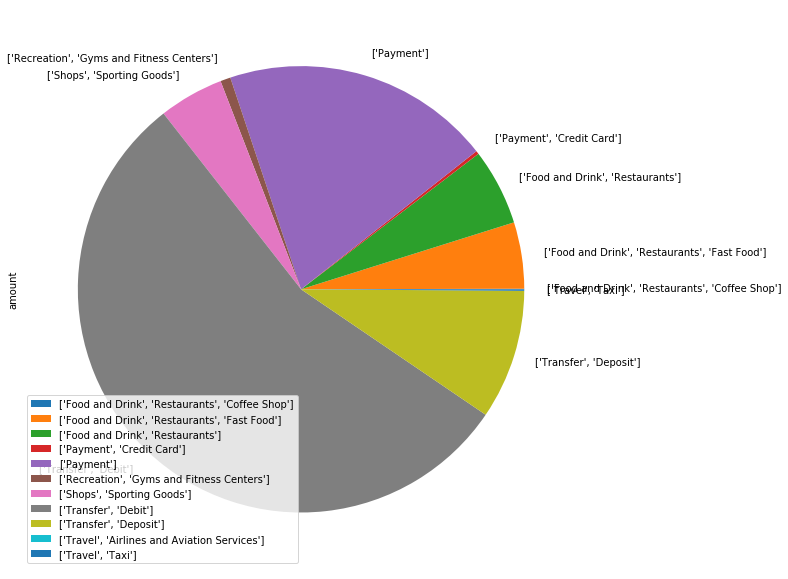

In [178]:
#This block of code is to handle negative expenses which prevent formulation of a pie chart
RevisedTargetDF=pd.DataFrame(TargetDF.groupby("category")["amount"].sum())
a = RevisedTargetDF.index[RevisedTargetDF['amount'] < 0] # Find Negative Values
RevisedTargetDF=RevisedTargetDF.drop(a,axis=0)
type(RevisedTargetDF)
print(a)
RevisedTargetDF.head(10)
#negatives = RevisedTargetDF.index[RevisedTargetDF['amount'] < 0]
#RevisedTargetDF[RevisedTargetDF.select_dtypes(include=[np.number]).ge(0).all(1)]
#RevisedTargetDF.select_dtype

# Create a spending categories pie chart.
plot = RevisedTargetDF.plot.pie(y='amount', figsize=(10, 20))

### Calculate the expenses per month

In [143]:
# Create a DataFrame with the total expenses
TargetDF.groupby(pd.Grouper(freq='M'))['amount'].sum()
# Display sample data
TargetDF.groupby([TargetDF.index.month,TargetDF['category']]).sum()

amount
date category                                                 
4    ['Food and Drink', 'Restaurants', 'Coffee Shop']     4.33
     ['Food and Drink', 'Restaurants', 'Fast Food']     512.00
     ['Food and Drink', 'Restaurants']                  589.40
     ['Payment', 'Credit Card']                          25.00
     ['Payment']                                       2078.50
     ['Recreation', 'Gyms and Fitness Centers']          78.50
     ['Shops', 'Sporting Goods']                        500.00
     ['Transfer', 'Credit']                              -4.22
     ['Transfer', 'Debit']                             5850.00
     ['Transfer', 'Deposit']                           1000.00
     ['Travel', 'Airlines and Aviation Services']         0.00
     ['Travel', 'Taxi']                                  11.73
5    ['Food and Drink', 'Restaurants', 'Coffee Shop']     4.33
     ['Food and Drink', 'Restaurants', 'Fast Food']     512.00
     ['Food and Drink', 'Restaurants']                  589.40
     ['Payment', 'Credit Card']                          25.00
     ['Payment']                                       2078.50
     ['Recreation', 'Gyms and Fitness Centers']          78.50
     ['Shops', 'Sporting Goods']                        500.00
     ['Transfer', 'Credit']                              -4.22
     ['Transfer', 'Debit']                             5850.00
     ['Transfer', 'Deposit']                           1000.00
     ['Travel', 'Airlines and Aviation Services']         0.00
     ['Travel', 'Taxi']                                  11.73
6    ['Food and Drink', 'Restaurants', 'Coffee Shop']     4.33
     ['Food and Drink', 'Restaurants', 'Fast Food']     512.00
     ['Food and Drink', 'Restaurants']                  589.40
     ['Payment', 'Credit Card']                          25.00
     ['Payment']                                       2078.50
     ['Recreation', 'Gyms and Fitness Centers']          78.50
     ['Shops', 'Sporting Goods']                        500.00
     ['Transfer', 'Credit']                              -4.22
     ['Transfer', 'Debit']                             5850.00
     ['Transfer', 'Deposit']                           1000.00
     ['Travel', 'Airlines and Aviation Services']         0.00
     ['Travel', 'Taxi']                                  11.73

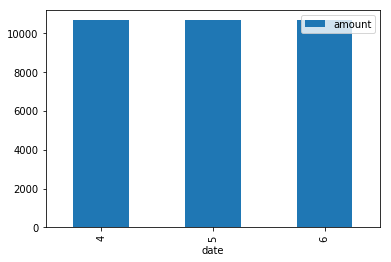

In [145]:
# Create a spending per month bar chart
TargetDF.groupby([TargetDF.index.month]).sum().plot(kind='bar')